In [1]:
from astropy.utils.data import get_pkg_data_filename
import matplotlib.pyplot as plt
from astropy.io import fits
# from astropy.wcs import wcs
from astropy.wcs import WCS
import pandas as pd
import numpy as np
import random
import shutil
import csv 
import os  #操作系统接口模块
import re  #正则表达式

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


007170-3-00634


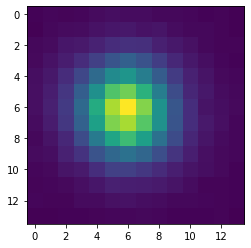

003643-1-00053


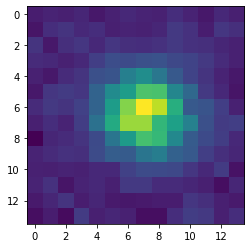

005318-6-00073


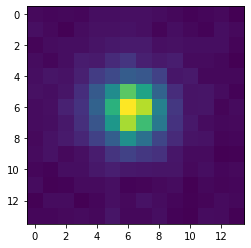

005313-6-00118


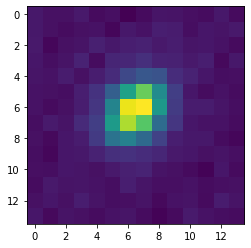

002888-4-00107


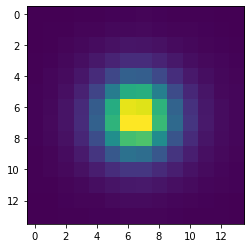

005390-2-00131


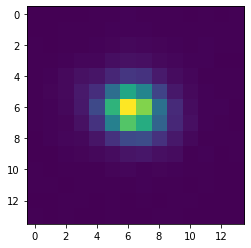

003606-3-00158


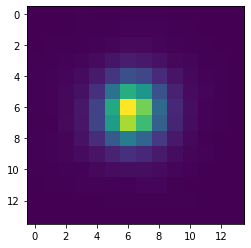

003631-6-00326


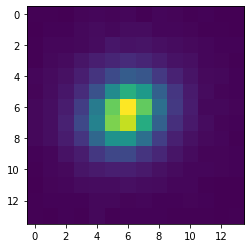

003644-1-00194


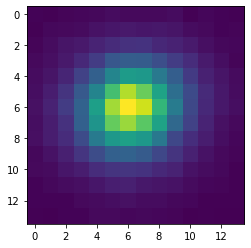

003635-3-00152


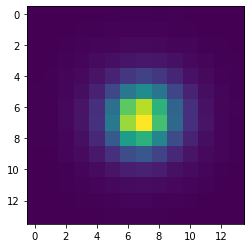

004448-6-00071


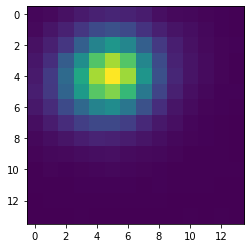

004569-5-00015


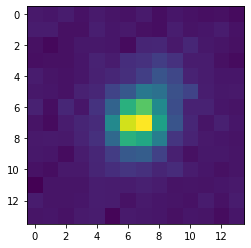

a floating-point value was expected. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


005622-4-00273


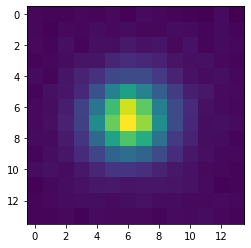

004152-1-00114


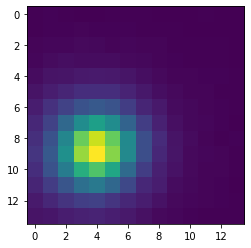

007047-6-00160


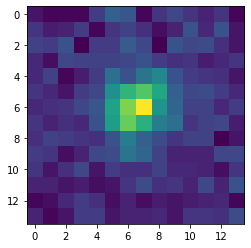

002248-6-00195


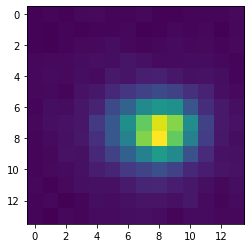

003818-6-00055


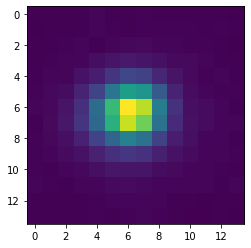

002328-3-00131


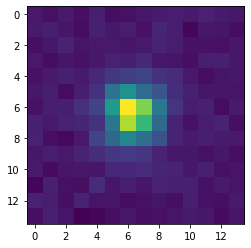

007170-5-00166


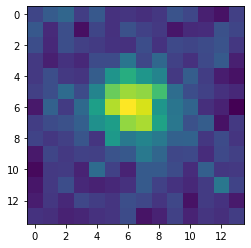

007106-2-00397


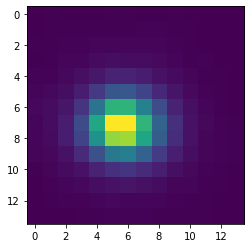

STRIP   ='N          '         / Strip in the stripe being tracked.              [astropy.io.fits.card]
FLAVOR  ='science    '         / Flavor of this run                              [astropy.io.fits.card]
SYS_SCN ='mean       '         / System of the scan great circle (e.g., mean)    [astropy.io.fits.card]
OBJECT  ='100 N      '         / e.g., 'stripe 50.6 degrees, north strip'        [astropy.io.fits.card]
EXPTIME ='53.901312'           / Exposure time (seconds)                         [astropy.io.fits.card]
DAVERS  ='v12_3   '            / Version of DA software                          [astropy.io.fits.card]
Changed DATE-OBS from '19/09/98' to '1998-09-19''. [astropy.wcs.wcs]


005732-3-00053


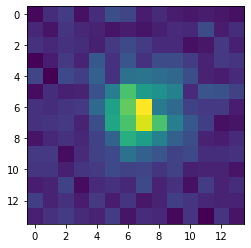

002304-3-00338


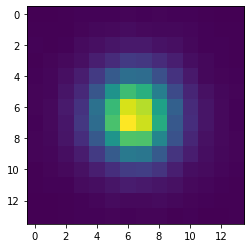

004649-5-00446


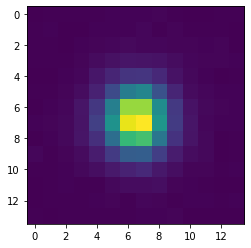

006447-2-00282


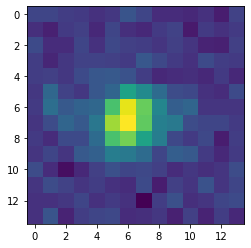

006920-6-00386


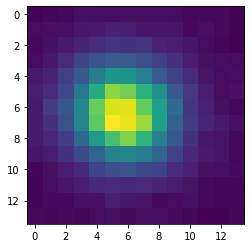

005754-3-00747


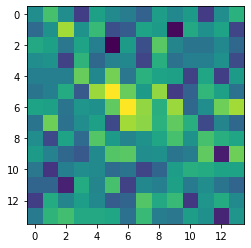

003893-6-00256


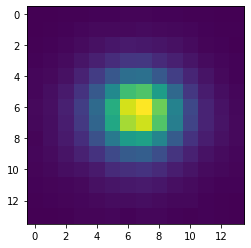

001458-5-00635


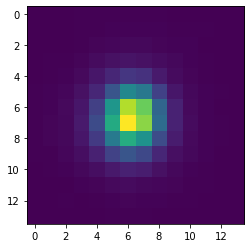

007161-3-00387


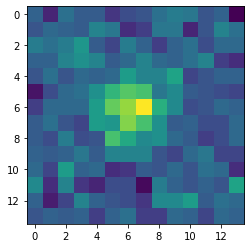

005895-1-00663


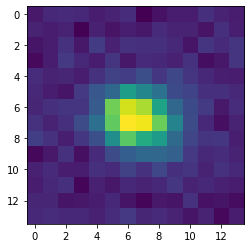

002248-6-00210


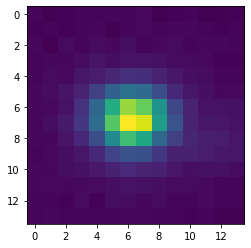

003628-2-00130


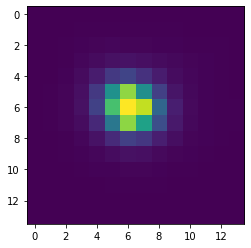

005849-2-00014


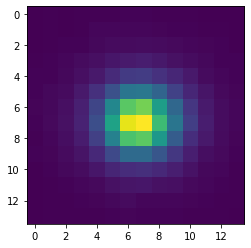

003437-5-00300


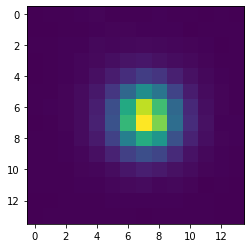

005731-2-00071


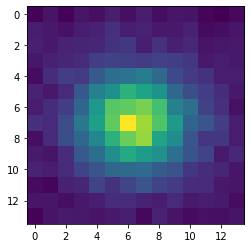

006533-4-00286


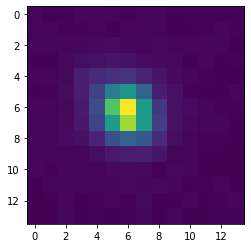

005622-5-00173


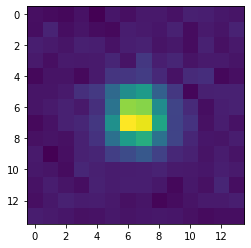

006618-3-00164


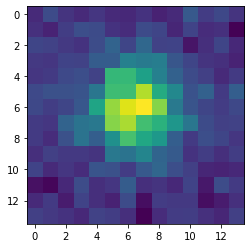

005194-1-00288


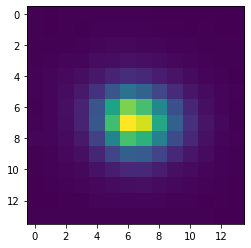

007121-2-00383


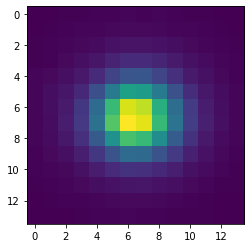

005137-6-00136


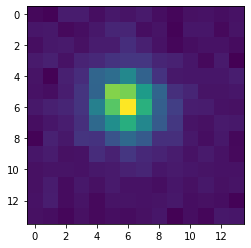

006417-5-00169


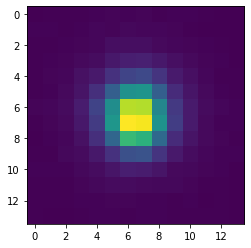

005765-5-00013


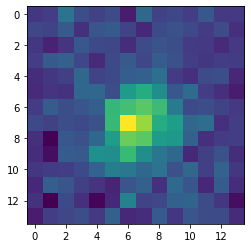

001895-6-00228


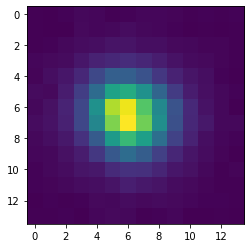

002887-3-00234


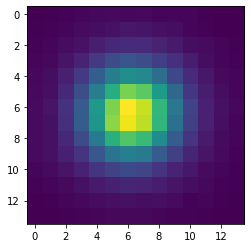

003634-4-00105


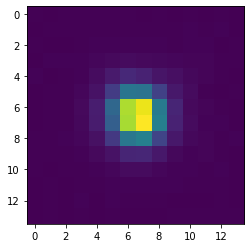

006513-4-00710


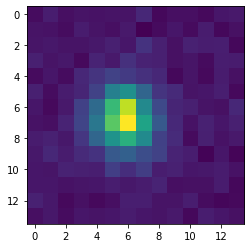

006314-5-00654


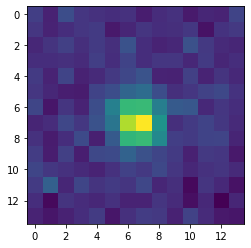

005847-2-00753


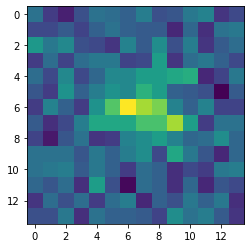

006422-3-00120


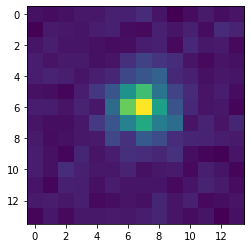

002589-2-00100


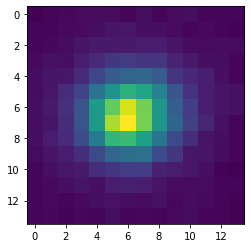

006425-6-00728


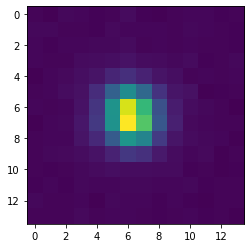

005087-6-00170


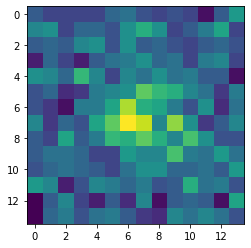

001140-3-00017


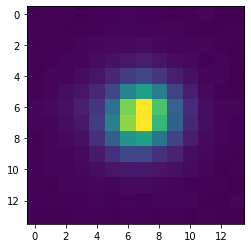

005066-3-00091


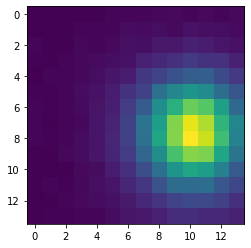

002820-4-00225


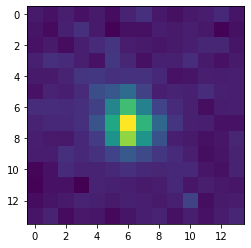

002888-6-00052


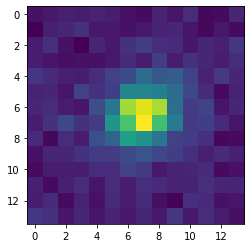

003225-6-00319


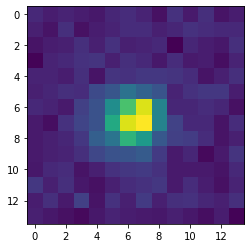

002886-1-00279


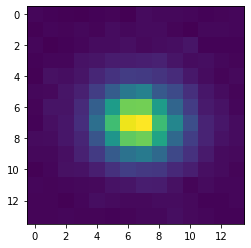

006597-6-00032


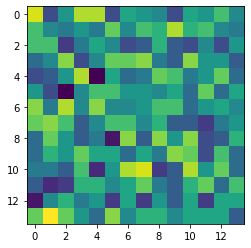

007054-2-00604


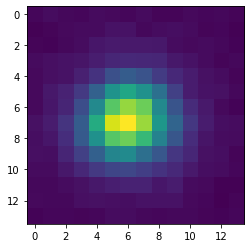

000756-4-00373


OBJECT  ='10 N       '         / e.g., 'stripe 50.6 degrees, north strip'        [astropy.io.fits.card]
EXPTIME ='53.911552'           / Exposure time (seconds)                         [astropy.io.fits.card]
DAVERS  ='v12_6   '            / Version of DA software                          [astropy.io.fits.card]
Changed DATE-OBS from '22/03/99' to '1999-03-22''. [astropy.wcs.wcs]


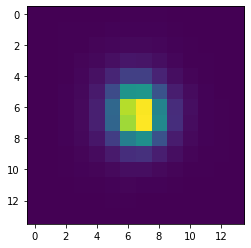

007121-4-00788


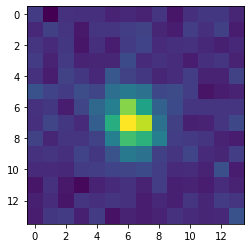

001331-4-00228


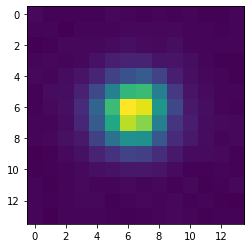

005314-1-00236


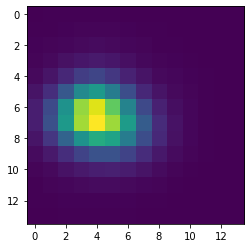

003015-2-00269


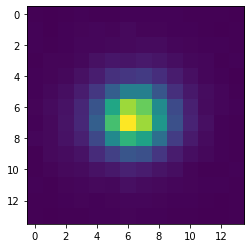

005137-6-00303


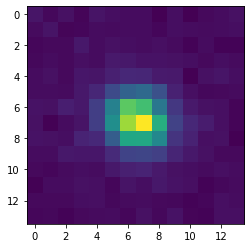

007038-1-00412


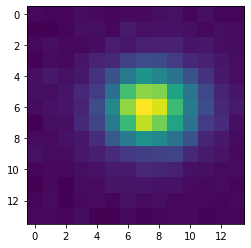

001402-5-00110


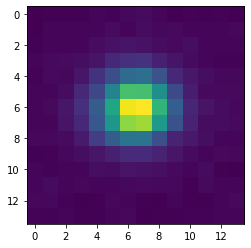

005312-6-00051


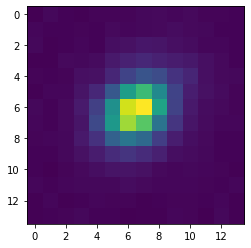

002826-6-00203


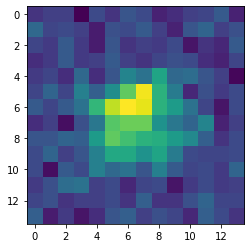

002206-1-00198


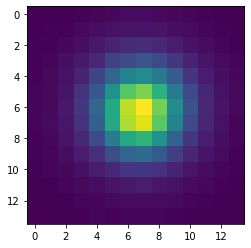

005870-5-00383


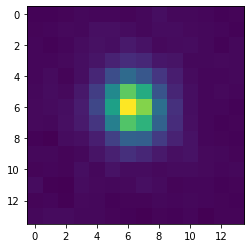

001478-3-00111


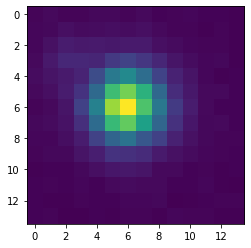

003438-2-00124


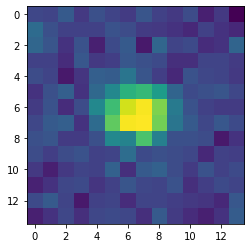

005782-4-00085


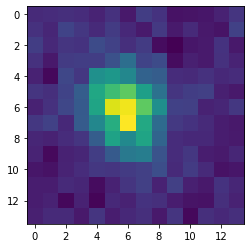

003512-4-00044


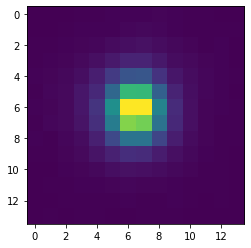

006552-5-00386


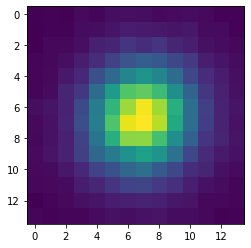

003513-6-00031


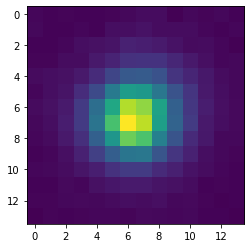

004858-6-00539


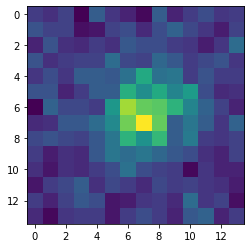

006412-2-00141


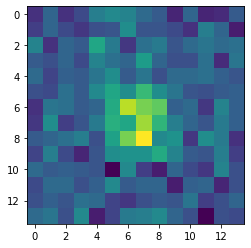

In [2]:
#图片名格式化
def str_1(str_origin, str_add):
    str_out = str_origin
    str_out = str_out[0:7]+str_add+str_out[7:9]+str_out[10:]
    return  str_out

#加载数据
data = pd.read_csv('lamost_dr7_star_list.csv',header=None,names=["type","ra","dec","p_name"])
data = np.array(data)
data1 = data

a=[random.randint(0,len(data)) for _ in range(300)] #任选随机300条数据

for i in a:
    index = np.where(data[:,3] == data[i][3]) #找到该图片对应的所有坐标
    n = index[0].shape
    n = int(np.array(n))
    filepath = '../../../lamost_dr7_star/frame/fpC-'+str_1(data[i][3],'u')+'.fit.gz'
    if os.path.isfile(filepath):
        raw_picture=fits.open(filepath)
        image_data = raw_picture[0].data
        wcs=WCS(raw_picture[0].header)
        if (raw_picture[0].header['CTYPE1'] == 'RA---TAN')== True & (raw_picture[0].header['CTYPE2'] == 'DEC--TAN') == True:
            for j in range(n):
                x,y=wcs.all_world2pix(data[index[0][j],1],data[index[0][j],2],1)
                if np.isnan(x) == False & np.isnan(y) == False:
                    if (7<x<=2040)==True & (7<y<=1480)==True:
                        shutil.copy('../../../lamost_dr7_star/frame/fpC-'+str_1(data[i][3],'u')+'.fit.gz', 'frame3/u_fit/'+str_1(data[i][3],'u')+'.fit.gz')
#                         shutil.copy('../../../lamost_dr7_star/frame/fpC-'+str_1(data[i][3],'g')+'.fit.gz', 'frame3/g_fit/'+str_1(data[i][3],'g')+'.fit.gz')
#                         shutil.copy('../../../lamost_dr7_star/frame/fpC-'+str_1(data[i][3],'r')+'.fit.gz', 'frame3/r_fit/'+str_1(data[i][3],'r')+'.fit.gz')
                        f = open('world2pix3/u_csv/'+data1[i,3]+'.csv', 'a', encoding='utf-8', newline='') #保存亮点像素坐标 
                        # 基于文件对象构建 csv写入对象
                        csv_writer = csv.writer(f)
                        csv_writer.writerow([x,y])
                        f.close()
                        ima = image_data[int(y) - 7:int(y) + 7, int(x) - 7:int(x) + 7]
                        print(data[i][3])
#                         plt.imshow(ima)
#                         plt.show()

007170-3-00634


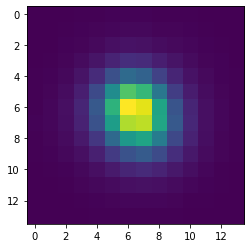

003643-1-00053


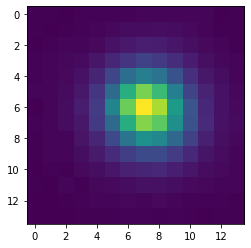

005318-6-00073


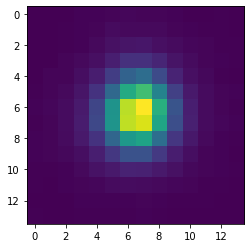

005313-6-00118


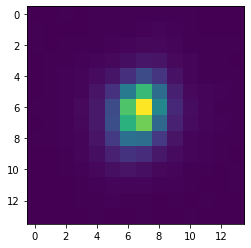

002888-4-00107


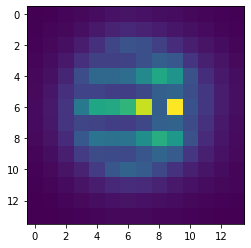

005390-2-00131


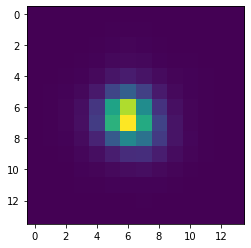

003606-3-00158


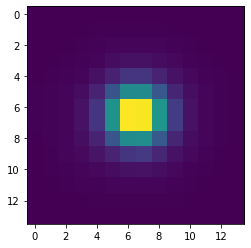

003631-6-00326


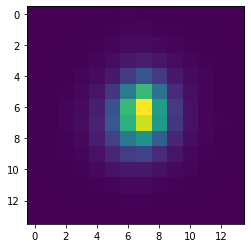

003644-1-00194


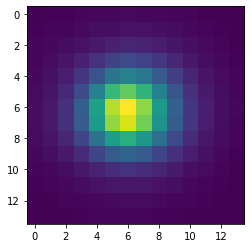

003635-3-00152


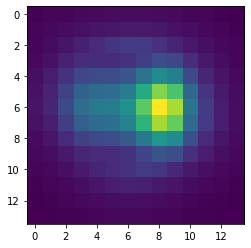

004448-6-00071


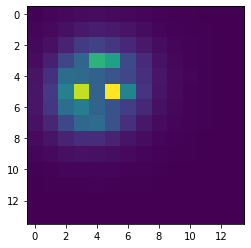

004569-5-00015


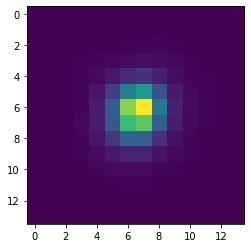

005622-4-00273


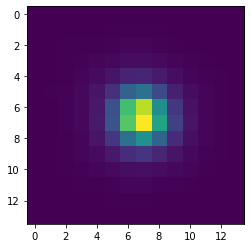

004152-1-00114


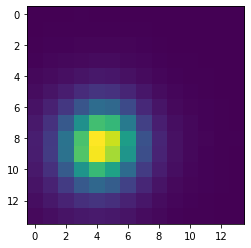

007047-6-00160


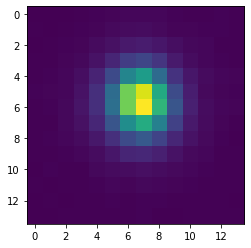

002248-6-00195


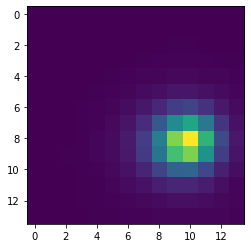

003818-6-00055


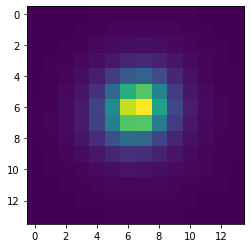

002328-3-00131


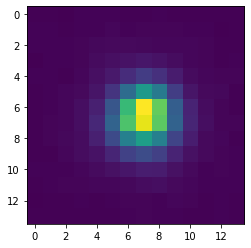

007170-5-00166


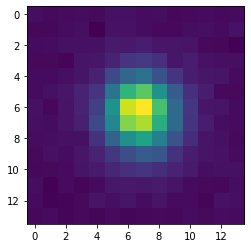

007106-2-00397


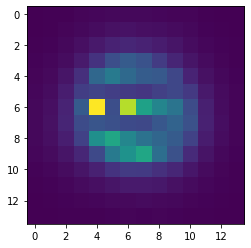

005732-3-00053


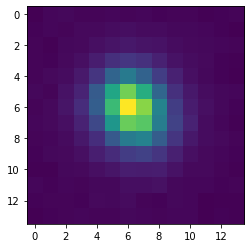

002304-3-00338


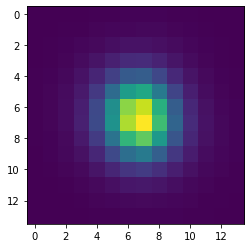

004649-5-00446


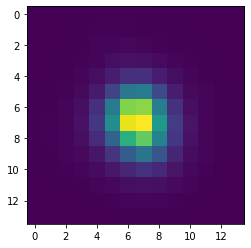

006447-2-00282


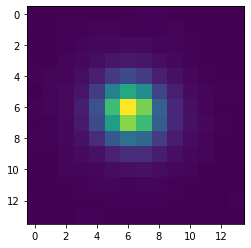

006920-6-00386


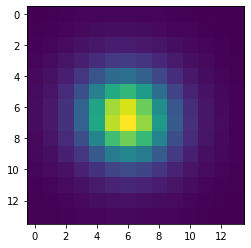

005754-3-00747


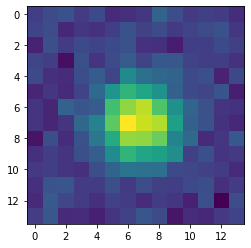

003893-6-00256


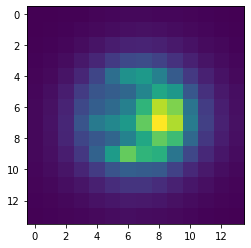

001458-5-00635


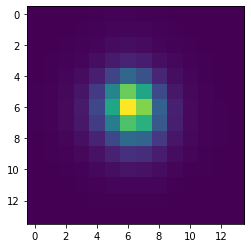

007161-3-00387


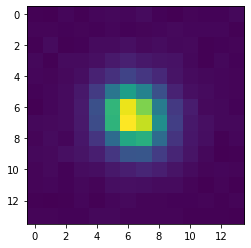

005895-1-00663


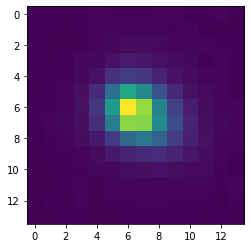

002248-6-00210


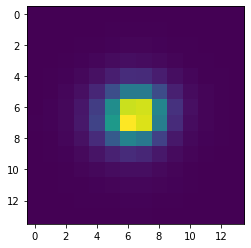

003628-2-00130


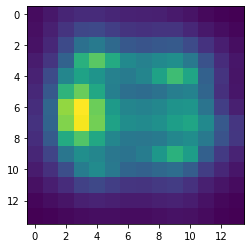

005849-2-00014


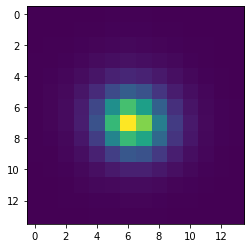

003437-5-00300


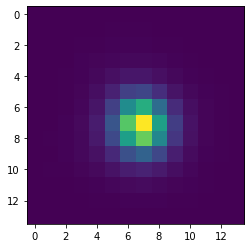

005731-2-00071


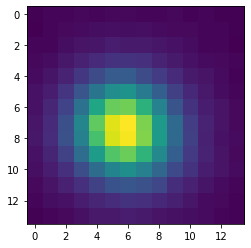

006533-4-00286


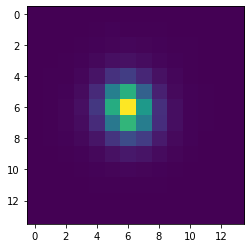

005622-5-00173


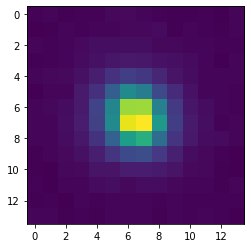

006618-3-00164


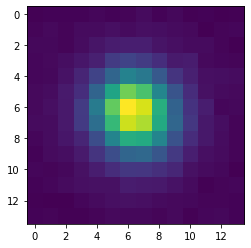

005194-1-00288


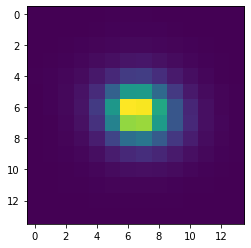

007121-2-00383


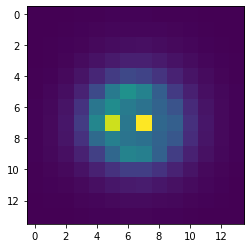

005137-6-00136


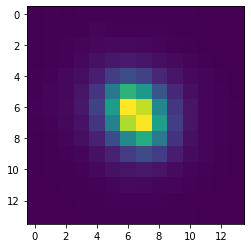

006417-5-00169


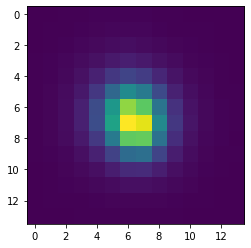

005765-5-00013


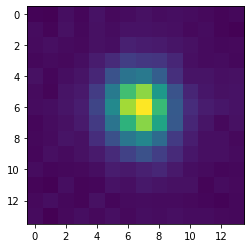

001895-6-00228


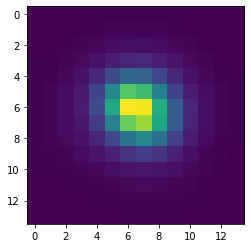

002887-3-00234


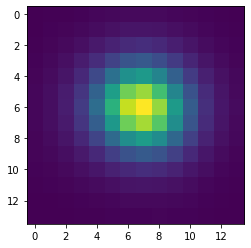

003634-4-00105


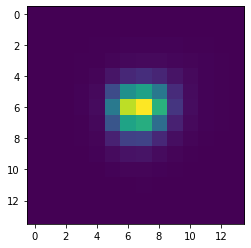

006513-4-00710


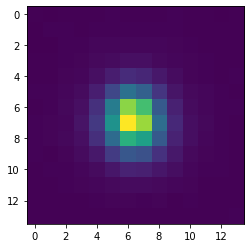

006314-5-00654


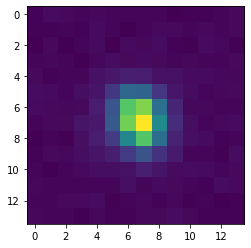

005847-2-00753


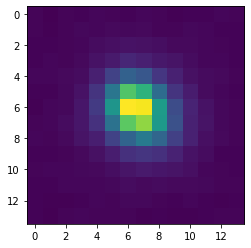

006422-3-00120


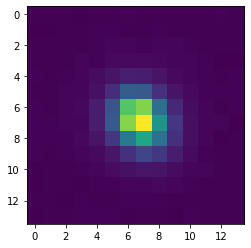

002589-2-00100


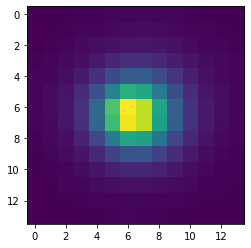

006425-6-00728


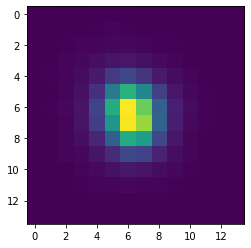

005087-6-00170


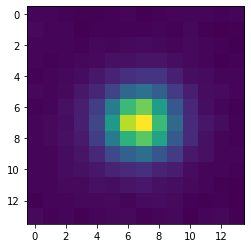

001140-3-00017


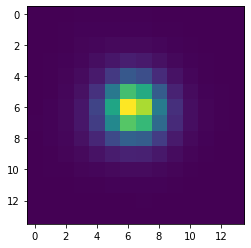

005066-3-00091


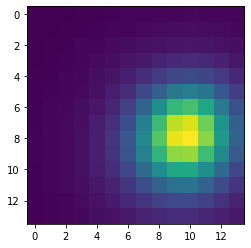

002820-4-00225


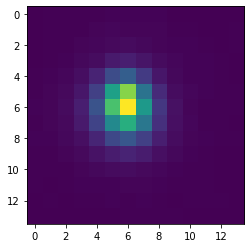

002888-6-00052


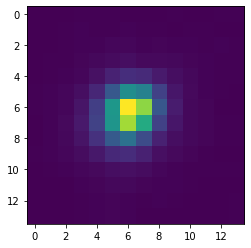

003225-6-00319


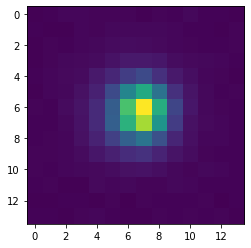

002886-1-00279


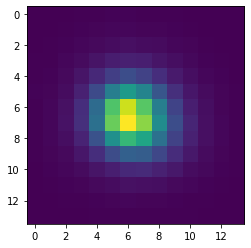

006597-6-00032


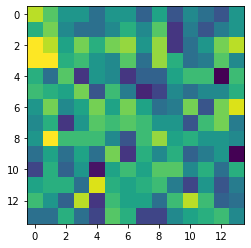

007054-2-00604


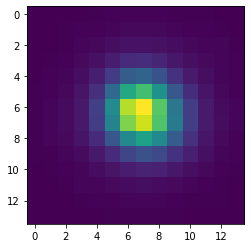

000756-4-00373


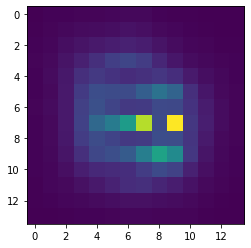

007121-4-00788


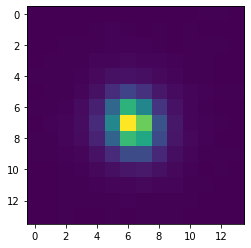

001331-4-00228


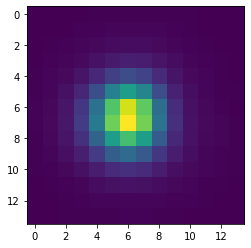

005314-1-00236


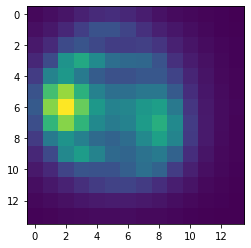

003015-2-00269


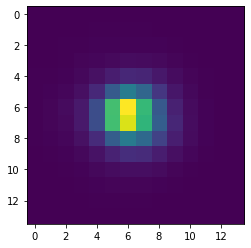

005137-6-00303


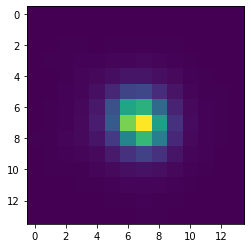

007038-1-00412


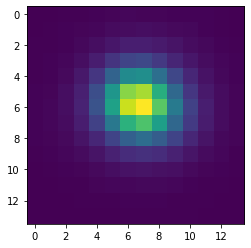

001402-5-00110


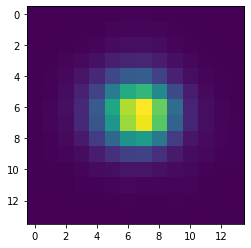

005312-6-00051


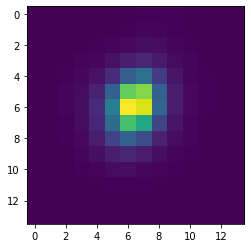

002826-6-00203


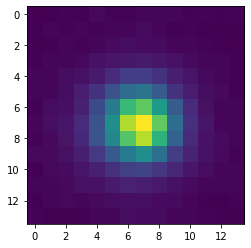

002206-1-00198


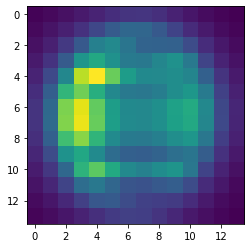

005870-5-00383


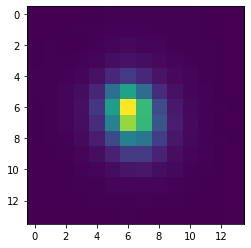

001478-3-00111


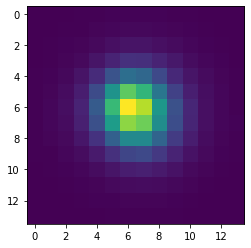

003438-2-00124


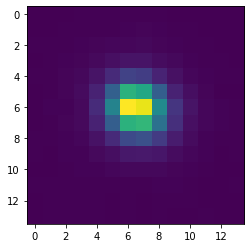

005782-4-00085


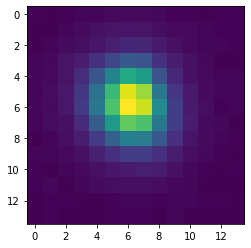

003512-4-00044


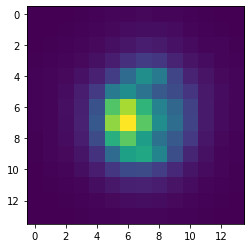

006552-5-00386


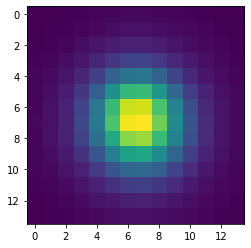

003513-6-00031


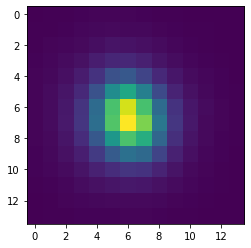

004858-6-00539


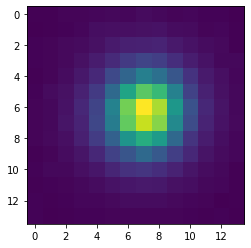

006412-2-00141


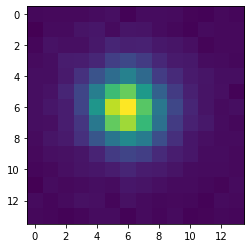

In [3]:
#图片名格式化
def str_1(str_origin, str_add):
    str_out = str_origin
    str_out = str_out[0:7]+str_add+str_out[7:9]+str_out[10:]
    return  str_out

#加载数据
data = pd.read_csv('lamost_dr7_star_list.csv',header=None,names=["type","ra","dec","p_name"])
data = np.array(data)
data1 = data

for i in a:
    index = np.where(data[:,3] == data[i][3]) #找到该图片对应的所有坐标
    n = index[0].shape
    n = int(np.array(n))
    filepath = '../../../lamost_dr7_star/frame/fpC-'+str_1(data[i][3],'g')+'.fit.gz'
    if os.path.isfile(filepath):
        raw_picture=fits.open(filepath)
        image_data = raw_picture[0].data
        wcs=WCS(raw_picture[0].header)
        if (raw_picture[0].header['CTYPE1'] == 'RA---TAN')== True & (raw_picture[0].header['CTYPE2'] == 'DEC--TAN') == True:
            for j in range(n):
                x,y=wcs.all_world2pix(data[index[0][j],1],data[index[0][j],2],1)
                if np.isnan(x) == False & np.isnan(y) == False:
                    if (7<x<=2040)==True & (7<y<=1480)==True:
#                         shutil.copy('../../../lamost_dr7_star/frame/fpC-'+str_1(data[i][3],'u')+'.fit.gz', 'frame3/u_fit/'+str_1(data[i][3],'u')+'.fit.gz')
                        shutil.copy('../../../lamost_dr7_star/frame/fpC-'+str_1(data[i][3],'g')+'.fit.gz', 'frame3/g_fit/'+str_1(data[i][3],'g')+'.fit.gz')
#                         shutil.copy('../../../lamost_dr7_star/frame/fpC-'+str_1(data[i][3],'r')+'.fit.gz', 'frame3/r_fit/'+str_1(data[i][3],'r')+'.fit.gz')
                        f = open('world2pix3/g_csv/'+data1[i,3]+'.csv', 'a', encoding='utf-8', newline='') #保存亮点像素坐标 
                        # 基于文件对象构建 csv写入对象
                        csv_writer = csv.writer(f)
                        csv_writer.writerow([x,y])
                        f.close()
                        ima = image_data[int(y) - 7:int(y) + 7, int(x) - 7:int(x) + 7]
                        print(data[i][3])
                        plt.imshow(ima)
                        plt.show()

007170-3-00634


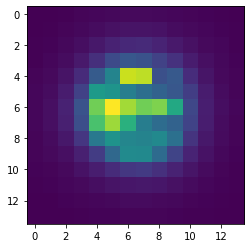

003643-1-00053


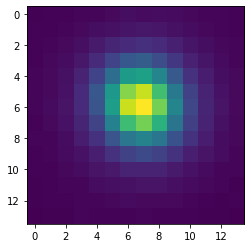

005318-6-00073


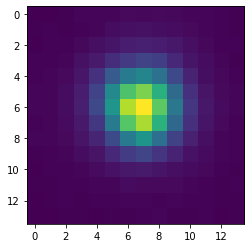

005313-6-00118


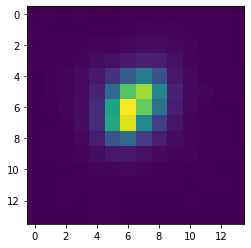

002888-4-00107


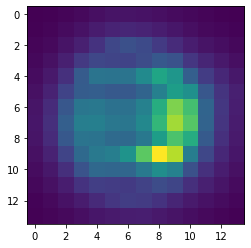

005390-2-00131


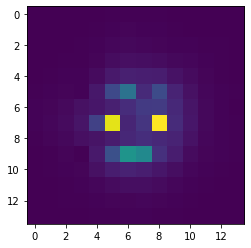

003606-3-00158


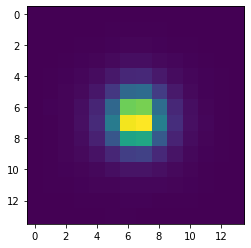

003631-6-00326


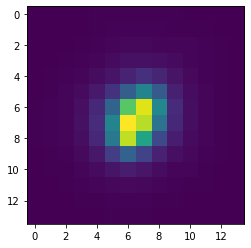

003644-1-00194


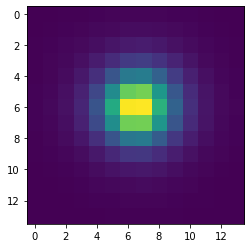

003635-3-00152


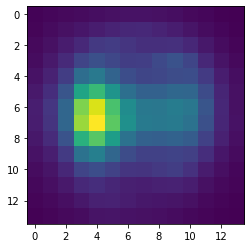

004448-6-00071


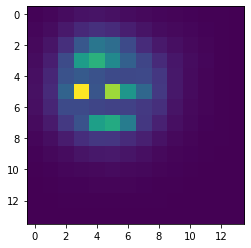

007155-4-00287


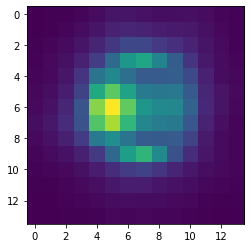

004569-5-00015


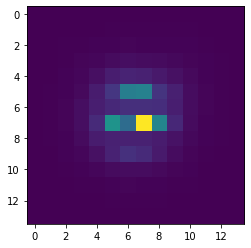

005622-4-00273


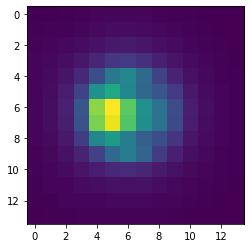

004152-1-00114


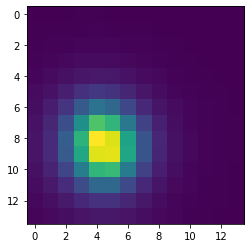

007047-6-00160


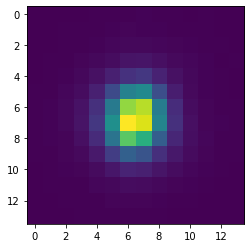

002248-6-00195


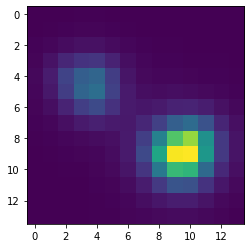

003818-6-00055


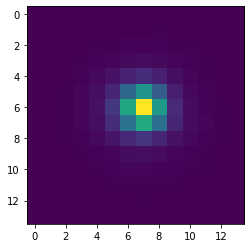

002328-3-00131


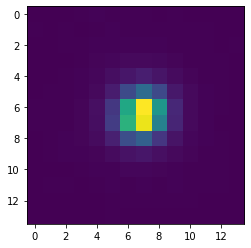

007170-5-00166


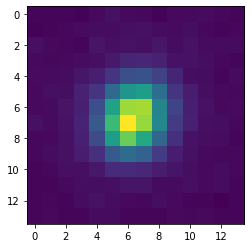

007106-2-00397


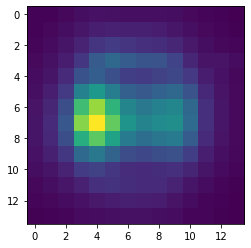

005732-3-00053


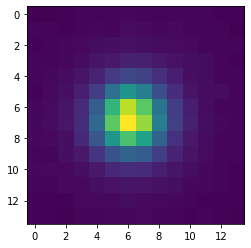

002304-3-00338


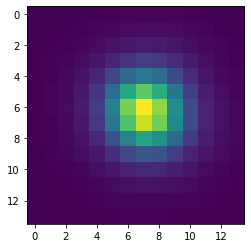

004649-5-00446


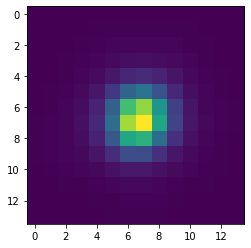

006447-2-00282


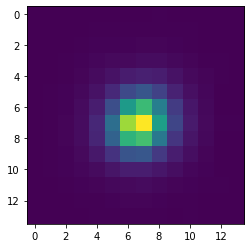

006920-6-00386


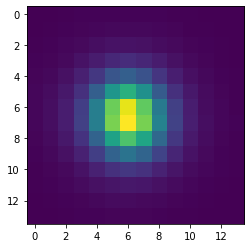

005754-3-00747


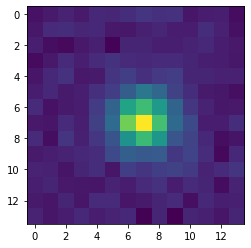

003893-6-00256


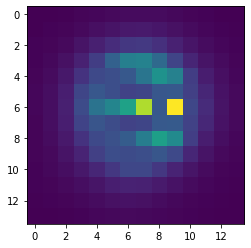

001458-5-00635


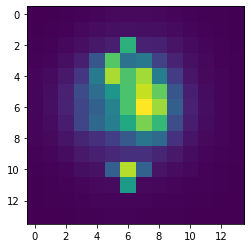

007161-3-00387


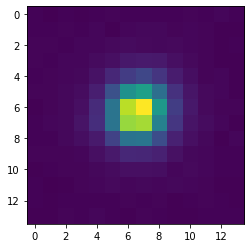

005895-1-00663


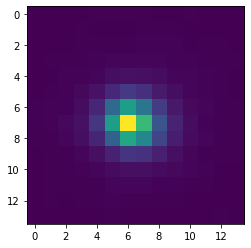

002248-6-00210


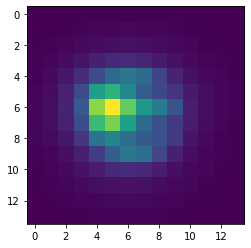

003628-2-00130


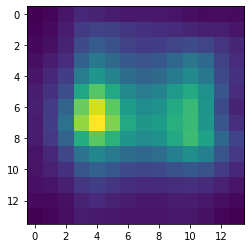

005849-2-00014


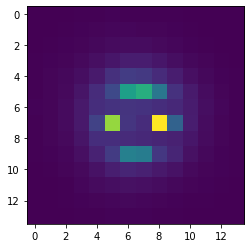

003437-5-00300


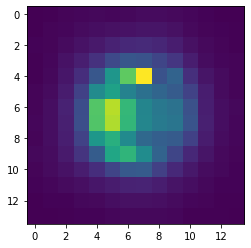

005731-2-00071


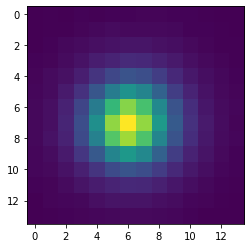

006533-4-00286


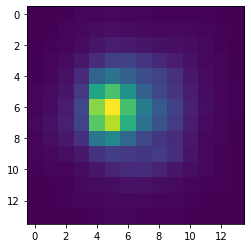

005622-5-00173


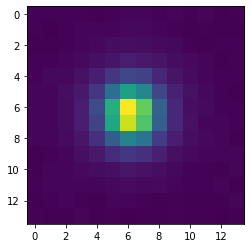

006618-3-00164


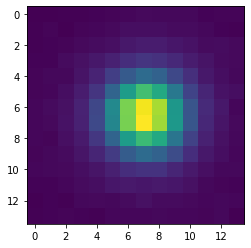

005194-1-00288


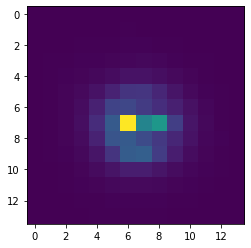

007121-2-00383


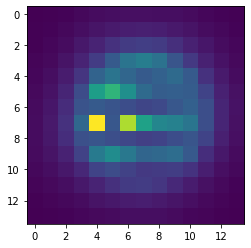

005137-6-00136


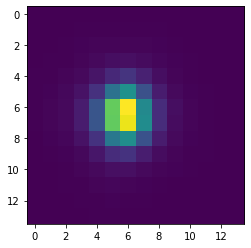

006417-5-00169


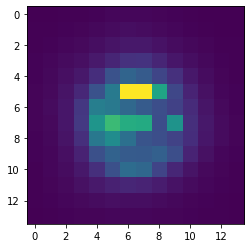

005765-5-00013


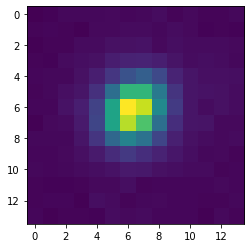

001895-6-00228


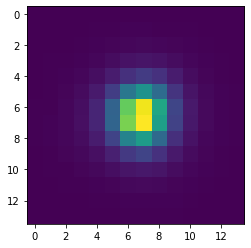

002887-3-00234


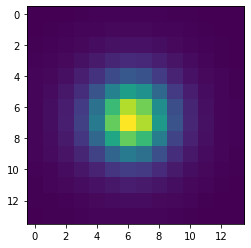

003634-4-00105


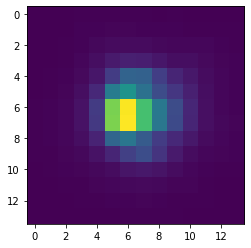

006513-4-00710


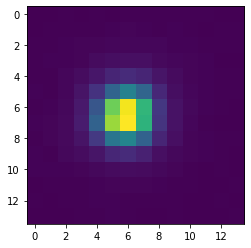

006314-5-00654


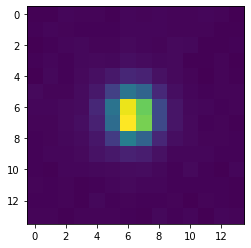

005847-2-00753


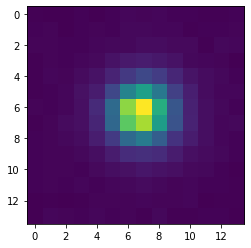

006422-3-00120


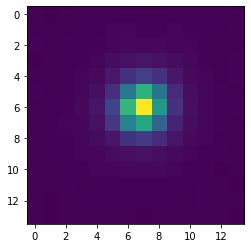

002589-2-00100


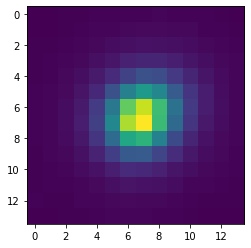

006425-6-00728


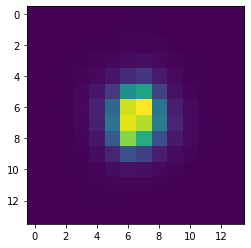

005087-6-00170


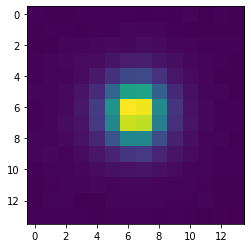

001140-3-00017


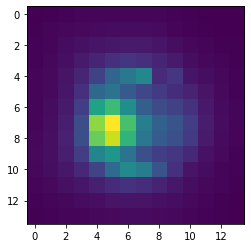

005066-3-00091


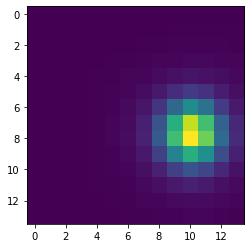

002820-4-00225


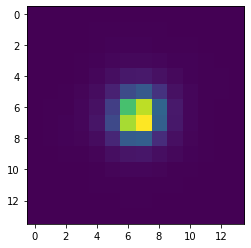

002888-6-00052


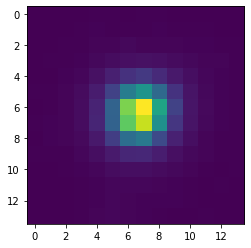

003225-6-00319


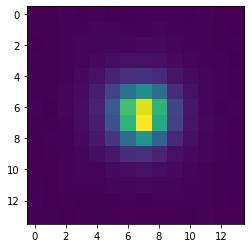

002886-1-00279


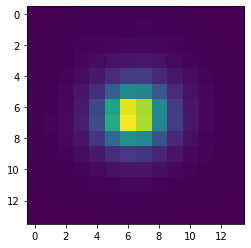

006597-6-00032


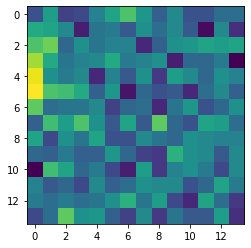

007054-2-00604


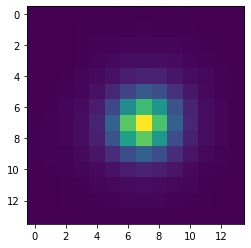

000756-4-00373


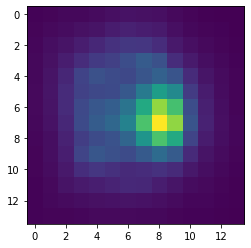

007121-4-00788


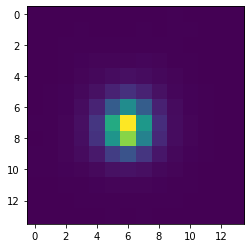

001331-4-00228


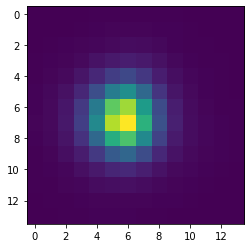

005314-1-00236


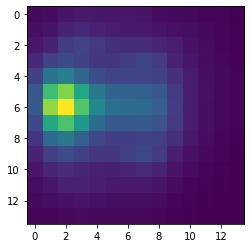

003015-2-00269


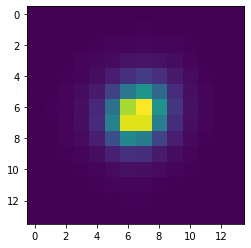

005137-6-00303


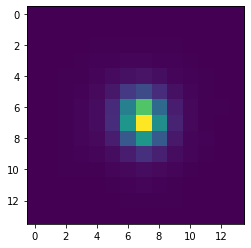

007038-1-00412


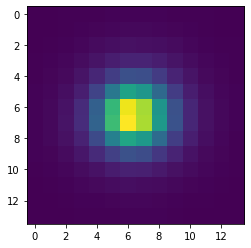

001402-5-00110


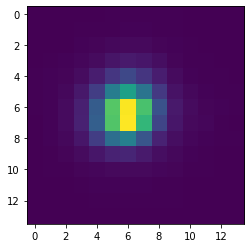

005312-6-00051


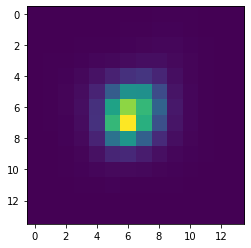

002826-6-00203


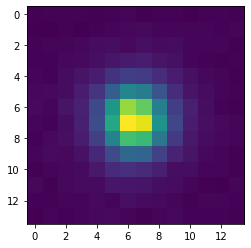

002206-1-00198


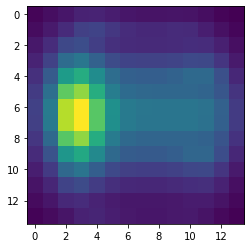

005870-5-00383


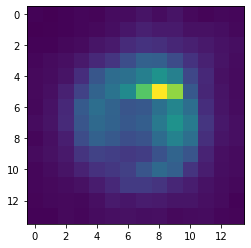

001478-3-00111


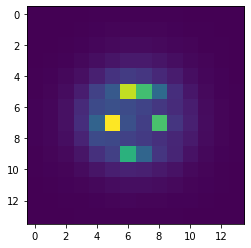

003438-2-00124


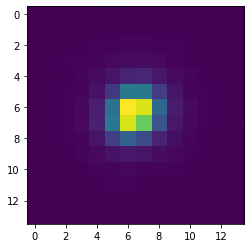

005782-4-00085


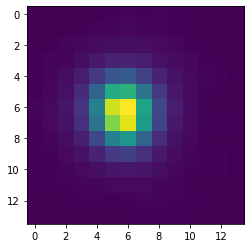

003512-4-00044


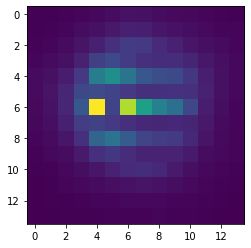

006552-5-00386


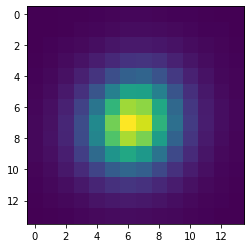

003513-6-00031


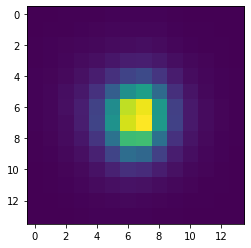

004858-6-00539


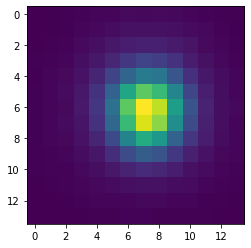

006412-2-00141


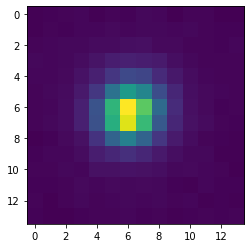

In [5]:
#图片名格式化
def str_1(str_origin, str_add):
    str_out = str_origin
    str_out = str_out[0:7]+str_add+str_out[7:9]+str_out[10:]
    return  str_out

#加载数据
data = pd.read_csv('lamost_dr7_star_list.csv',header=None,names=["type","ra","dec","p_name"])
data = np.array(data)
data1 = data

for i in a:
    index = np.where(data[:,3] == data[i][3]) #找到该图片对应的所有坐标
    n = index[0].shape
    n = int(np.array(n))
    filepath = '../../../lamost_dr7_star/frame/fpC-'+str_1(data[i][3],'r')+'.fit.gz'
    if os.path.isfile(filepath):
        raw_picture=fits.open(filepath)
        image_data = raw_picture[0].data
        wcs=WCS(raw_picture[0].header)
        if (raw_picture[0].header['CTYPE1'] == 'RA---TAN')== True & (raw_picture[0].header['CTYPE2'] == 'DEC--TAN') == True:
            for j in range(n):
                x,y=wcs.all_world2pix(data[index[0][j],1],data[index[0][j],2],1)
                if np.isnan(x) == False & np.isnan(y) == False:
                    if (7<x<=2040)==True & (7<y<=1480)==True:
#                         shutil.copy('../../../lamost_dr7_star/frame/fpC-'+str_1(data[i][3],'u')+'.fit.gz', 'frame3/u_fit/'+str_1(data[i][3],'u')+'.fit.gz')
#                         shutil.copy('../../../lamost_dr7_star/frame/fpC-'+str_1(data[i][3],'g')+'.fit.gz', 'frame3/g_fit/'+str_1(data[i][3],'g')+'.fit.gz')
                        shutil.copy('../../../lamost_dr7_star/frame/fpC-'+str_1(data[i][3],'r')+'.fit.gz', 'frame3/r_fit/'+str_1(data[i][3],'r')+'.fit.gz')
                        f = open('world2pix3/r_csv/'+data1[i,3]+'.csv', 'a', encoding='utf-8', newline='') #保存亮点像素坐标 
                        # 基于文件对象构建 csv写入对象
                        csv_writer = csv.writer(f)
                        csv_writer.writerow([x,y])
                        f.close()
                        ima = image_data[int(y) - 7:int(y) + 7, int(x) - 7:int(x) + 7]
                        print(data[i][3])
                        plt.imshow(ima)
                        plt.show()